In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/train (1).csv', dtype = np.float32)
test = pd.read_csv('/content/drive/MyDrive/data/test (1).csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/data/sample_submission.csv')

## Basics of Pytorch

# Matrices
In pytorch, matrix is called tensors.


In [ ]:
# numpy array
array = [[1,2,3], [4,5,6]]
first_array = np.array(array)

print(f"Array Type: {type(first_array)}")
print(f"Array Shape: {np.shape(first_array)}")
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [ ]:
tensor = torch.Tensor(array)

print(f"Tensor Type: {tensor.type}")
print(f"Tensor Shape: {tensor.shape}")
print(tensor)

Tensor Type: <built-in method type of Tensor object at 0x789965355d00>
Tensor Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


*  np.ones() = torch.ones()
*  np.random.rand() = torch.rand()

In [ ]:
# numpy: array
print(f"Numpy {np.ones((2,3))}\n")
# torch: tensor
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print(f"Numpy {np.random.rand(2, 3)}\n")
print(torch.rand(2,3))

Numpy [[0.79959618 0.38873968 0.3613043 ]
 [0.03430587 0.06346642 0.01642929]]

tensor([[0.3679, 0.8458, 0.2047],
        [0.0779, 0.6464, 0.1183]])




*   torch.from_numpy(): from numpy to tensor
*   numpy(): from tensor to numpy



In [ ]:
# create random array
array = np.random.rand(2, 3)
print(f"{type(array)} {array}\n")

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print(f"{from_numpy_to_tensor}\n")

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print(f"{type(from_tensor_to_numpy)} {from_tensor_to_numpy}\n")

<class 'numpy.ndarray'> [[0.9944103  0.41641622 0.68809016]
 [0.91811821 0.43382842 0.02481635]]

tensor([[0.9944, 0.4164, 0.6881],
        [0.9181, 0.4338, 0.0248]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.9944103  0.41641622 0.68809016]
 [0.91811821 0.43382842 0.02481635]]



# Basic Math with Pytorch




*   resize: view()
*   a and b are tensors

    *   torch.add(a, b)
    *   a.sub(b)
    *   torch.mul(a, b)
    *   torch.div(a, b)
    *   a.mean()
    *   a.std()













In [ ]:
# create tensor
tensor = torch.ones(3, 3)
print(tensor)

# resize
print(f"{tensor.view(9).shape} {tensor.view(9)}\n")

# addition
print(f"Addition: {torch.add(tensor, tensor)}\n")

# subtraction
print(f"Subtraction: {tensor.sub(tensor)}\n")

# Element-wise multiplication
print(f"Multiplication: {torch.mul(tensor, tensor)}\n")

# Element-wise division
print(f"Division: {torch.div(tensor, tensor)}\n")

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print(f"Mean: {tensor.mean()}\n")

# Standard Deviation
print(f"Std: {tensor.std()}")

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9]) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0

Std: 1.5811388492584229


# Variables
In NN, backpropagation acculumates gradients. Different from torch, variable accumulates gradients.


*   자동 미분(autograd) 지원
*   tracking



In [ ]:
from torch.autograd import Variable

In [ ]:
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [ ]:
# lets make basic backward propagation

array = [2, 4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(f"y = {y}")

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print("o =", o)

# backward: calculate gradients
o.backward()

print(f"gradients: {x.grad}")

y = tensor([ 4., 16.], grad_fn=<PowBackward0>)
o = tensor(10., grad_fn=<MulBackward0>)
gradients: tensor([2., 4.])


# Linear Regression


*   y = Ax + B (A: slope, B: bias)
*   predict a number of car selling depending on car price



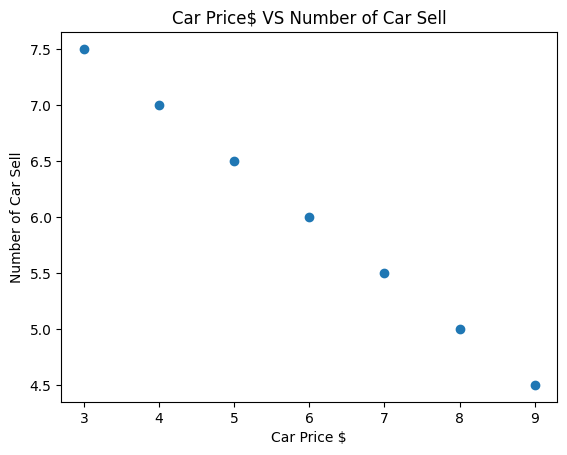

In [ ]:
# define car price
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype = np.float32)
car_price_np = car_price_np.reshape(-1,1) # (7, 1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# define the number of car
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype = np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1, 1) # (7, 1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# visualize data
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

Now, we're planning to predict the number of car selling when the car price is 100$. In order to do this, we should fit the model to this data.




**Steps of Linear Regression**

1.   create LinearRegression class
2.   define model from LinearRegression class
3. MSE
4. Optimization(SGD: Stochastic Gradient Descent)
5. Backpropagation
6. Prediction

epoch: 0, loss: 34.372257232666016
epoch: 50, loss: 4.256621360778809
epoch: 100, loss: 2.8763768672943115
epoch: 150, loss: 1.9436897039413452
epoch: 200, loss: 1.3134324550628662
epoch: 250, loss: 0.8875398635864258
epoch: 300, loss: 0.5997481346130371
epoch: 350, loss: 0.4052749276161194
epoch: 400, loss: 0.27386102080345154
epoch: 450, loss: 0.18505974113941193
epoch: 500, loss: 0.1250523179769516
epoch: 550, loss: 0.08450306951999664
epoch: 600, loss: 0.05710260197520256
epoch: 650, loss: 0.03858685865998268
epoch: 700, loss: 0.026074785739183426
epoch: 750, loss: 0.017619643360376358
epoch: 800, loss: 0.011906239204108715
epoch: 850, loss: 0.008045768365263939
epoch: 900, loss: 0.005436912178993225
epoch: 950, loss: 0.003673944156616926
epoch: 1000, loss: 0.0024826510343700647


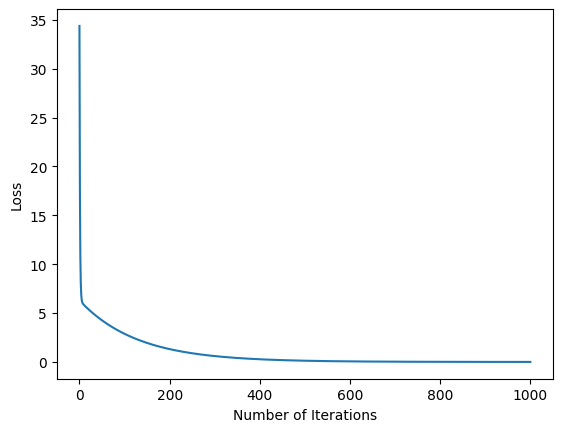

In [ ]:
# create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # inherit nn.Module by using super function
        # we can access everything in nn.Module
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization (find parameters which minimize MSE)
learning_rate = 0.02 # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#train model
loss_list = []
iteration_number = 1001

for iter in range(iteration_number):
    # optimizer initialization
    optimizer.zero_grad()

    # forward propagation
    results = model(car_price_tensor)

    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)

    # backpropagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # store loss
    loss_list.append(loss.data)

    # print loss
    if (iter % 50 == 0):
        print(f"epoch: {iter}, loss: {loss.data}")

plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

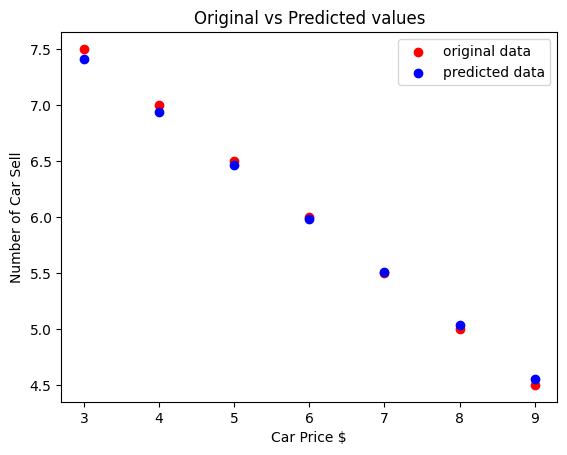

In [ ]:
# predict car price

predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, predicted, label = "predicted data", color = "blue")

# visualization을 통해 model이 car price에 따른 the number of car sell을 잘 예측한 것을 확인
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

# Logistic Regression
It is good for classification .

**Steps of Logistic Regression**


1.   import libraries
2.   prepare dataset: MNIST (28 x 28)
3. create logistic regression model
4. instanitate model: 모델의 객체 인스턴스 생성
5. instantiate loss: CrossEntropyLoss
6. instantiate optimier: SGD
7. train the model
8. prediction




29


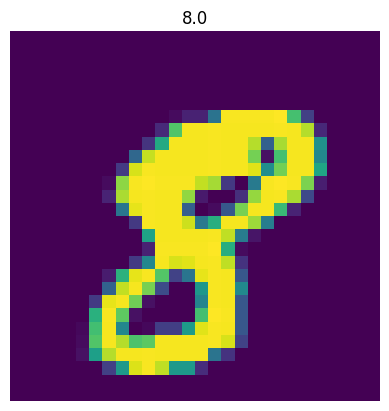

In [ ]:
# split data into features(pixels) and labels(0~9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values/255 # normalization

# train(80%) - test(20%) split
# random_state: seed
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size = 0.2, random_state = 42)

# create feature and target tensor for train
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

# create feautre and target tensor for test
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size, epoch and iteration
# len(features_train): 33600
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs) # 29
print(num_epochs)
# pytorch train and test sets
# TensorDataset(): manage features and targets
train = TensorDataset(featuresTrain, targetsTrain)
test = TensorDataset(featuresTest, targetsTest)

# DataLoader
train_loader = DataLoader(train, batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size, shuffle = False)

# visualize one of the images in the data
plt.imshow(features_numpy[10].reshape(28, 28))
plt.axis('off') # 축 표시 x
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [ ]:
# create Logistic Regression class
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

# instantiate model class
input_dim = 28*28 # the size of one image
output_dim = 10 # 10 classes from 0 to 9

# create logistic regression model
model = LogisticRegression(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
# training model
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs): # 29(number of epoch) x 336(num_iteration) = 9774 counts
    # i: index, (images, labels): real images and labels for each idx
    for i, (images, labels) in enumerate(train_loader):
        # define variables
        # Variable로 image를 tensor로 변환
        # view()를 사용하여 (1, 28*28)로 flatten
        train = Variable(images.view(-1, 28*28))
        lables = Variable(labels)

        # initialize optimizer
        optimizer.zero_grad()

        # forward propagation
        results = model(train)

        # calculate softmax and cross entropy loss
        loss = error(results, labels)

        # calculate gradient
        loss.backward()

        # update parameters
        optimizer.step()

        count += 1

        # prediction
        if (count % 50 == 0):
            # calculate accuracy
            correct = 0
            total = 0

            # predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                # forward propagation
                outputs = model(test)

                # get predictions from the maximum value
                # (outputs.data, 1)에서 1은 행에서 최대값을 찾으라는 뜻
                # 0부터 9까지 10개의 숫자 중에서 최대를 찾음
                # torch.max: 주어진 tensor의 최대값을 찾아 반환
                # 이때 (idx, label)로 반환되기 때문에 label을 지정하는 [1] 사용
                predicted = torch.max(outputs.data, 1)[1]

                # total length of labels
                total += len(labels)

                # total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)

        if (count % 500 == 0):
            print(f"Iteration: {count} Loss: {loss.data} Accuracy:{accuracy}%")

Iteration: 500 Loss: 1.832443356513977 Accuracy:67.82142639160156%
Iteration: 1000 Loss: 1.6061733961105347 Accuracy:75.9047622680664%
Iteration: 1500 Loss: 1.2848913669586182 Accuracy:78.41666412353516%
Iteration: 2000 Loss: 1.202397108078003 Accuracy:80.30952453613281%
Iteration: 2500 Loss: 1.0344799757003784 Accuracy:81.33333587646484%
Iteration: 3000 Loss: 0.9401451945304871 Accuracy:82.07142639160156%
Iteration: 3500 Loss: 0.8986619710922241 Accuracy:82.63095092773438%
Iteration: 4000 Loss: 0.7585792541503906 Accuracy:83.14286041259766%
Iteration: 4500 Loss: 0.9617758989334106 Accuracy:83.51190185546875%
Iteration: 5000 Loss: 0.8034555912017822 Accuracy:83.95237731933594%
Iteration: 5500 Loss: 0.7501436471939087 Accuracy:84.30952453613281%
Iteration: 6000 Loss: 0.8665691614151001 Accuracy:84.55952453613281%
Iteration: 6500 Loss: 0.6657930612564087 Accuracy:84.73809814453125%
Iteration: 7000 Loss: 0.716329038143158 Accuracy:84.96428680419922%
Iteration: 7500 Loss: 0.638008594512939

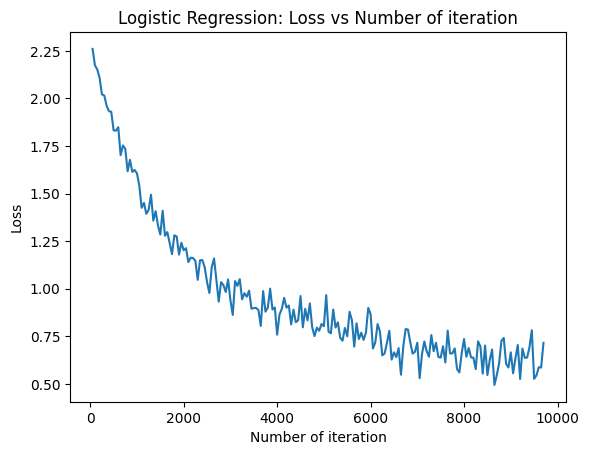

In [ ]:
# visualization

plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

## Artificial Neural Network(ANN)

Even logistic regression is good at classification problem, if the complexity of model increases, then the accuracy decreases. Therefore, using ANN, we can add non-linearity as a hidden layer(complexity) to a model.

**Step of ANN**


1.   import libraries
2.   prepare dataset: MNIST
3. create ANN model: has 3 hidden layer, use ReLU, tanh, ELU activation function
4. instantiate model class
5. instantiate loss: CrossEntropyLoss
6. instantiate optimizer:SGD optimizer
7. training the model
8. prediction



In [ ]:
# create ANN model class
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # 28*28 -> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        # 150 -> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        # 150 -> 150
        # ELU: ReLU의 한계 보완
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        # 150 -> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.tanh2(out)

        out = self.fc3(out)
        out = self.elu3(out)

        out = self.fc4(out)

        return out

# instantiate ANNModel
input_dim = 28*28
output_dim = 10
hidden_dim = 150 # hidden_dim is one of the hyperparameters that should be tunes

# create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.02)

In [ ]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs): # 9774 = 29(num_epochs) x 336(number of batch)
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # initialize optimizer
        optimizer.zero_grad()

        # forward propagation
        outputs = model(images)

        # Cross Entropy Loss
        loss = error(outputs, labels)

        # calculating gradients
        loss.backward()

        # update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader: # mini-batch size만큼 가져옴(100개)
                test = Variable(images.view(-1, 28*28))

                # forward propagation
                outputs = model(test)

                # prediction
                predicted = torch.max(outputs.data, 1)[1]

                # total number of labels
                total += len(labels)

                # total correct predictions
                correct += (predicted == labels).sum()

            # 100 * 총 맞힌 개수 / testset 전체 길이
            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count) # [1, 2...9774]
            accuracy_list.append(accuracy)

        if count % 500 == 0:
            print(f"Iteration: {count} Loss: {loss.data} Accuracy: {accuracy}")

Iteration: 500 Loss: 0.767890989780426 Accuracy: 78.55952453613281
Iteration: 1000 Loss: 0.48702359199523926 Accuracy: 87.32142639160156
Iteration: 1500 Loss: 0.23076534271240234 Accuracy: 89.46428680419922
Iteration: 2000 Loss: 0.28697147965431213 Accuracy: 90.45237731933594
Iteration: 2500 Loss: 0.3147846460342407 Accuracy: 91.92857360839844
Iteration: 3000 Loss: 0.12518739700317383 Accuracy: 92.48809814453125
Iteration: 3500 Loss: 0.2637885808944702 Accuracy: 93.17857360839844
Iteration: 4000 Loss: 0.06406960636377335 Accuracy: 93.64286041259766
Iteration: 4500 Loss: 0.33659598231315613 Accuracy: 94.25
Iteration: 5000 Loss: 0.10696854442358017 Accuracy: 94.60713958740234
Iteration: 5500 Loss: 0.18630486726760864 Accuracy: 94.71428680419922
Iteration: 6000 Loss: 0.19129133224487305 Accuracy: 95.05952453613281
Iteration: 6500 Loss: 0.09782185405492783 Accuracy: 95.36904907226562
Iteration: 7000 Loss: 0.13343483209609985 Accuracy: 95.75
Iteration: 7500 Loss: 0.0961933359503746 Accuracy

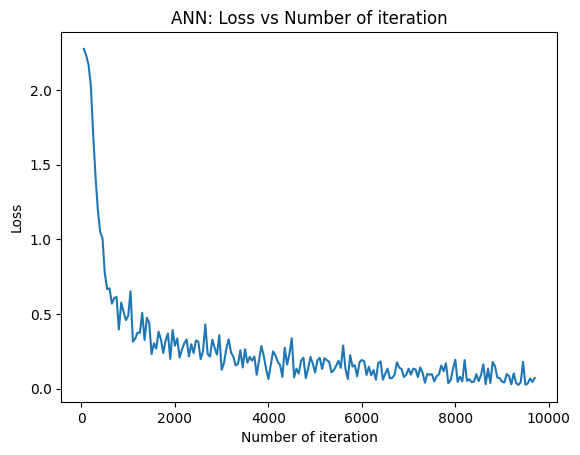

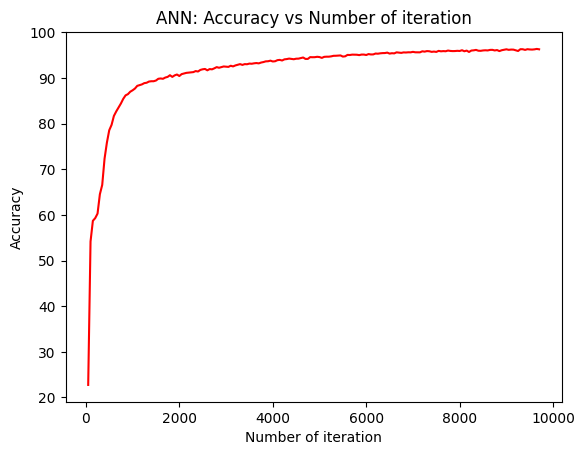

In [ ]:
# visualization

plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list, accuracy_list, color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()